In [1]:
import re
import csv
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from myutils.util import read_log_file, split_into_blocks, extract_block_data, analyze_log

#### 📄 Vehicle Block Extraction from Simulation Log

This snippet processes the simulation log file to extract structured vehicle block data into a Pandas DataFrame for analysis.



In [2]:
# simulation log file
log_file = '../data/log_2025-11-07__16;50;25.txt'

In [ ]:
# read log file
log_lines = read_log_file(log_file)
# split into carrier blocks
blocks = split_into_blocks(log_lines)

extracted_data = []

# Extract structured data
data = [
    extract_block_data(block, i + 1)
    for i, block in enumerate(blocks)
    if extract_block_data(block, i + 1) is not None
]

# Convert to DataFrame
extracted_df = pd.DataFrame(data)

#### 📊 `extracted_df` Overview

`extracted_df` is a Pandas DataFrame containing structured data extracted from vehicle block operations in a MATSim simulation log. Each row represents a single vehicle's block execution.

##### 🔢 Columns Explained

| Column           | Description                                                                 |
|------------------|-----------------------------------------------------------------------------|
| `vehicle`        | Unique identifier assigned to each vehicle block (sequential integer).      |
| `number_of_jobs` | Number of jobs assigned to the vehicle during its block operation.          |
| `block_time_ms`  | Total duration of the block operation in milliseconds (end - start time).   |
| `algo_time_ms`   | Time taken by the vrp algorithm to compute the vrp solution, in milliseconds.       |
| `start_ms`       | Start timestamp of the block operation, converted to milliseconds.          |
| `end_ms`         | End timestamp of the block operation, converted to milliseconds.            |

This DataFrame is used for performance analysis, correlation studies, and depot-level aggregation.


In [4]:
# view extracted data

extracted_df

,vehicle,number_of_jobs,block_time_ms,algo_time_ms,start_ms,end_ms
0,1,10,864,292,60872360,60873224
1,2,12,175,110,60873224,60873399
2,3,12,89,67,60873399,60873488
3,4,10,96,54,60873505,60873601
4,5,12,91,71,60873601,60873692
...,...,...,...,...,...,...
2962,2963,12,252,75,64248829,64249081
2963,2964,6,27,17,64249098,64249125
2964,2965,7,30,26,64249146,64249176
2965,2966,81,1185,556,64249196,64250381


#### 🧪 Analyzing the Log File

This snippet runs the full log analysis pipeline using the `analyze_log()` function. It extracts structured insights from the simulation log and prints two key summary tables.

In [5]:
cep_summary, phase_timing = analyze_log(log_file)
print("📦 CEPDepot Summary")
print(cep_summary)
print("\n⏱️ Simulation Phase Timing")
print(phase_timing)

NameError: name 'extract_vehicle_blocks' is not defined

In [47]:
extracted_df['block_time_ms'].sum()

np.int64(2937585)

In [46]:
extracted_df[extracted_df['algo_time_ms']>5000].shape[0]

54

In [44]:
def plot_ycol_vs_jobs(y_column, df):
    """
    Plots a scatter plot and regression line between 'number_of_jobs' and the specified y_column.
    Also prints the Pearson correlation coefficient and p-value.

    Parameters:
    - y_column (str): The name of the column to use for the y-axis.
    - df (pd.DataFrame): The DataFrame containing the data.
    """
    sns.set_theme(style="whitegrid")

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='number_of_jobs', y=y_column, s=100)
    #sns.regplot(data=df, x='number_of_jobs', y=y_column, scatter=True, ci=None)

    plt.xlabel('Number of Jobs')
    plt.ylabel(y_column.replace('_', ' ').title())
    plt.title(f'Correlation between Number of Jobs and {y_column.replace("_", " ").title()}')

    plt.show()

    corr_coef, p_value = pearsonr(df['number_of_jobs'], df[y_column])
    print(f"Pearson correlation coefficient: {corr_coef:.3f}")
    print(f"P-value: {p_value:.3e}")


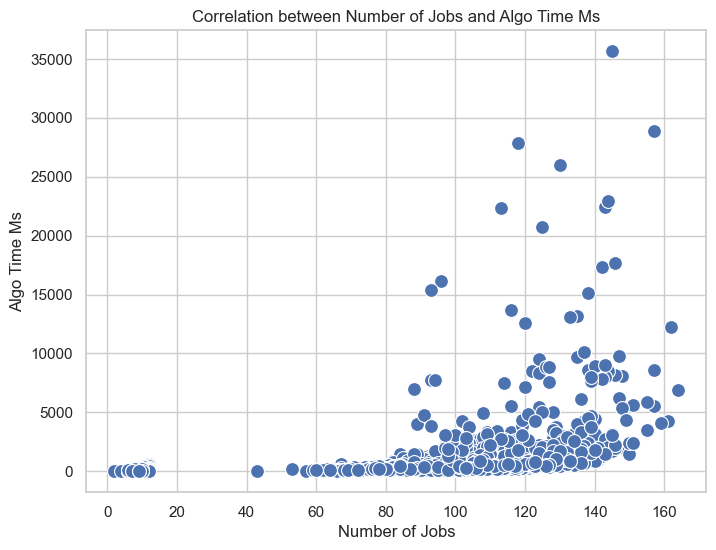

Pearson correlation coefficient: 0.373
P-value: 2.517e-98


In [ ]:
plot_ycol_vs_jobs('algo_time_ms', extracted_df)

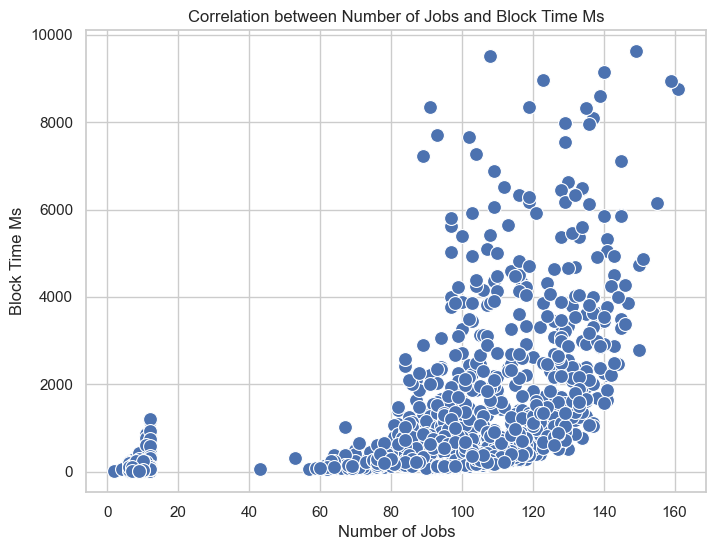

Pearson correlation coefficient: 0.549
P-value: 1.211e-228


In [45]:
plot_ycol_vs_jobs('block_time_ms', extracted_temp_bl)